In [1]:
## For some arithmetic and Matrix Operations
import numpy as np

## Dataframe Manipulation
import pandas as pd

## For Visualization
import matplotlib.pyplot as plt

## For Visualization too
import seaborn as sns

## Creating Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


## Creating a function transformer
from sklearn.preprocessing import FunctionTransformer

## For Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector


## For preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

## For missing values
from sklearn.impute import SimpleImputer

## Getting the recall score on our train set
from sklearn.metrics import recall_score

## Getting the accuracy score on train set
from sklearn.metrics import accuracy_score

## Getting the classification report from our train set
from sklearn.metrics import classification_report

## Cross validation
from sklearn.model_selection import cross_val_score

## Gridsearch CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


## Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('CVD_cleaned.csv')
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

(None,
   General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
 0           Poor  Within the past 2 years       No            No          No   
 1      Very Good     Within the past year       No           Yes          No   
 2      Very Good     Within the past year      Yes            No          No   
 3           Poor     Within the past year      Yes           Yes          No   
 4           Good     Within the past year       No            No          No   
 
   Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
 0           No         No       No       Yes  Female        70-74   
 1           No         No      Yes        No  Female        70-74   
 2           No         No      Yes        No  Female        60-64   
 3           No         No      Yes        No    Male        75-79   
 4           No         No       No        No    Male          80+   
 
    Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
 0     

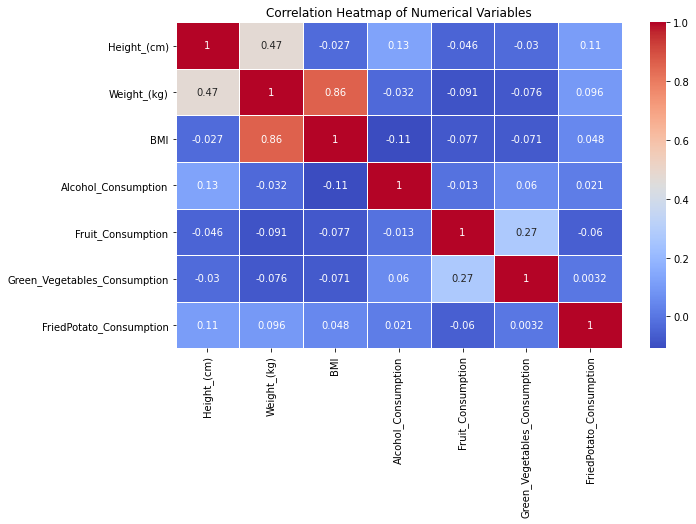

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation analysis
numerical_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                     'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


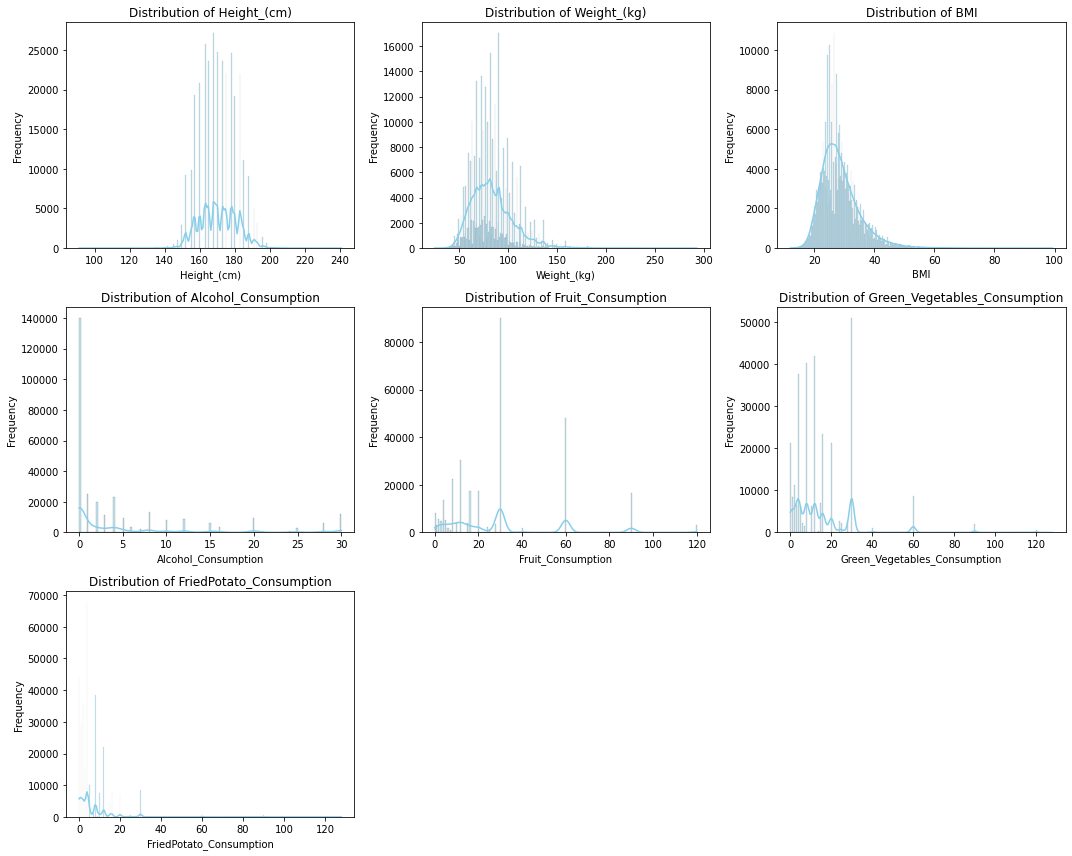

In [4]:
# Plot distribution of numerical variables
plt.figure(figsize=(15, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


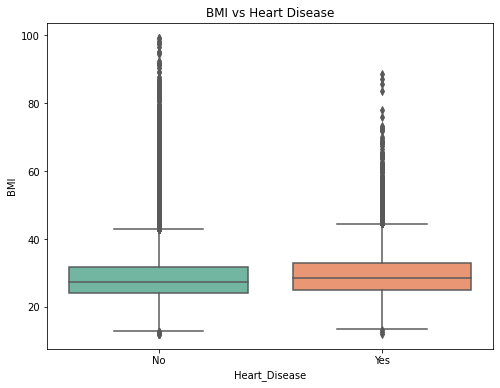

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for plotting BMI vs Heart Disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart_Disease', y='BMI', data=df, palette='Set2')
plt.title('BMI vs Heart Disease')
plt.show()


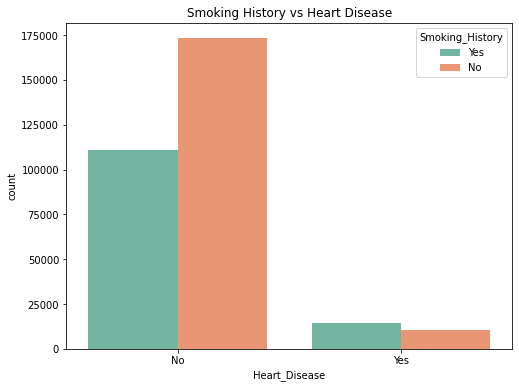

In [6]:
# Example for Smoking History and Heart Disease
plt.figure(figsize=(8, 6))
sns.countplot(x='Heart_Disease', hue='Smoking_History', data=df, palette='Set2')
plt.title('Smoking History vs Heart Disease')
plt.show()


In [7]:
# Visualize pairwise relationships and how Heart Disease affects them
# sns.pairplot(df, hue='Heart_Disease', vars=numerical_columns)
# plt.show()

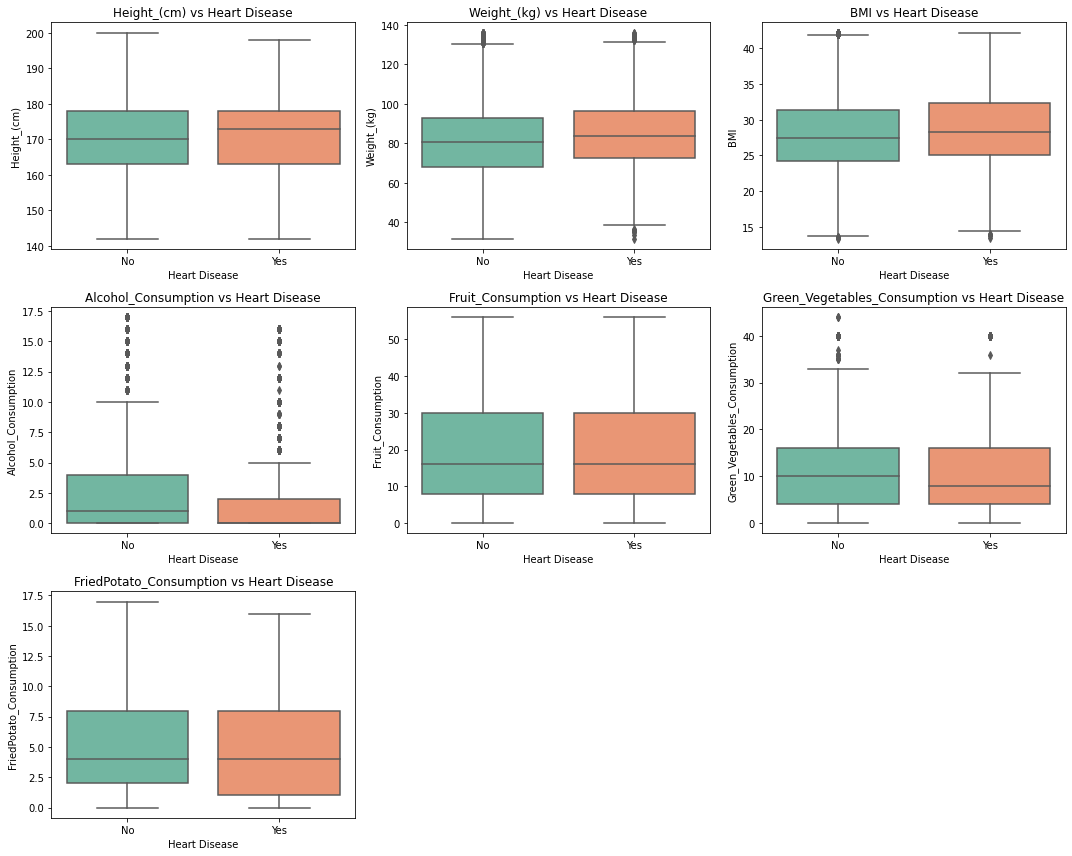

In [40]:
# Create boxplots to visualize the relationship between numerical variables and Heart_Disease
plt.figure(figsize=(15, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Heart_Disease', y=column, data=df, palette='Set2')
    plt.title(f'{column} vs Heart Disease')
    plt.xlabel('Heart Disease')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

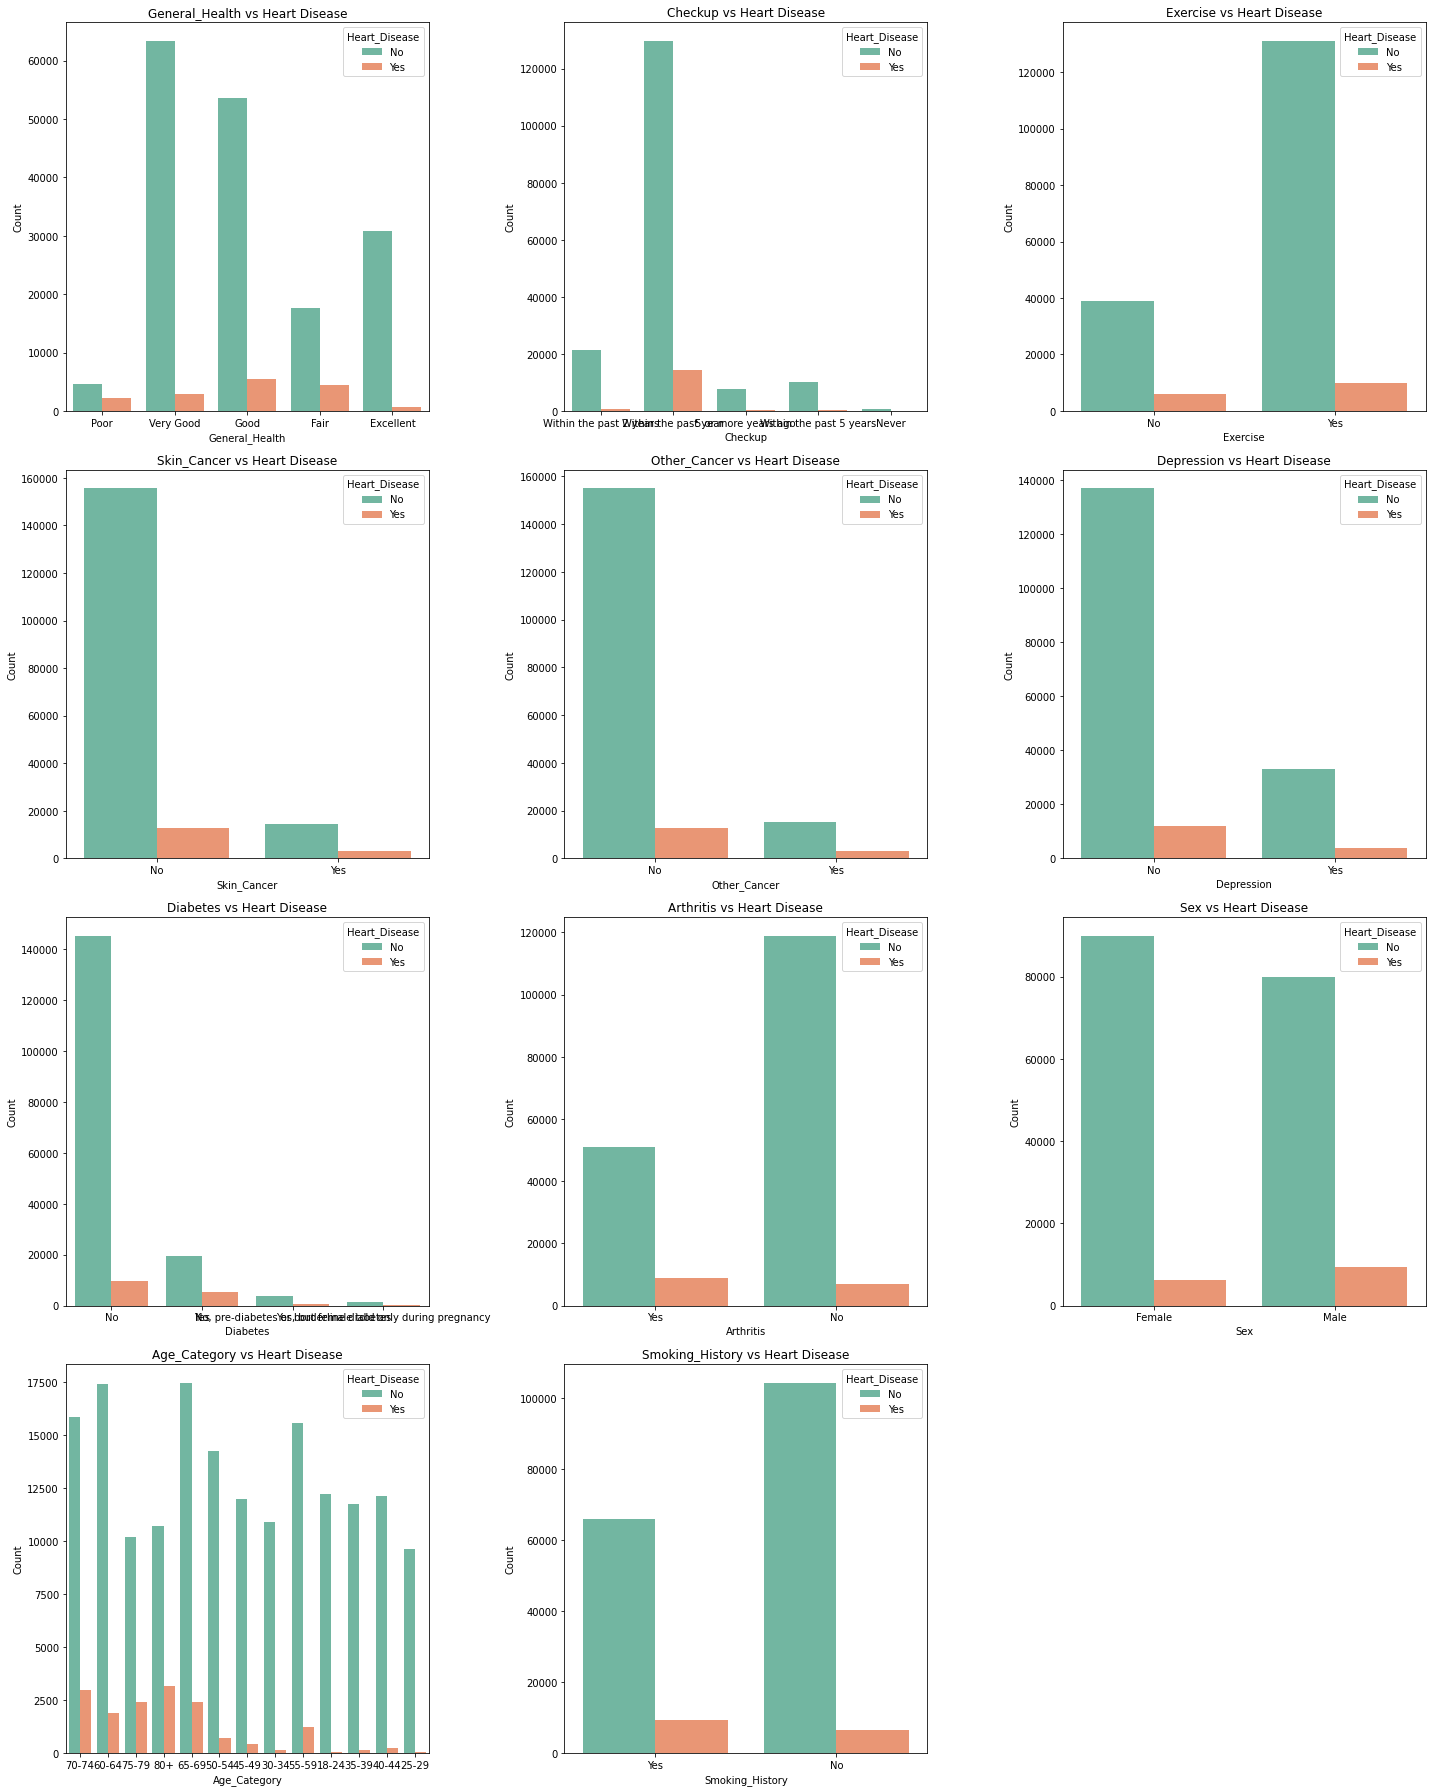

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables to compare with Heart Disease
categorical_columns = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 
                       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

# Create a bar plot for each categorical variable against Heart Disease
plt.figure(figsize=(20, 25))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=column, hue='Heart_Disease', data=df, palette='Set2')
    plt.title(f'{column} vs Heart Disease')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [9]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from key numerical columns
for column in ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 
               'Green_Vegetables_Consumption', 'FriedPotato_Consumption']:
    df = remove_outliers(df, column)

# Check the updated shape of the dataset after removing outliers
df.shape


(185803, 19)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical features using LabelEncoder
le = LabelEncoder()
data_encoded = df.copy()

# Encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data_encoded[col] = le.fit_transform(data_encoded[col])

# Define features (X) and target (y) for binary classification (e.g., predicting Heart_Disease)
X = data_encoded.drop('Heart_Disease', axis=1)  # Drop the target variable
y = data_encoded['Heart_Disease']  # The target variable (Heart_Disease)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features for models that require it (e.g., KNN, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(X_train.shape, X_test.shape)

((148642, 18), (37161, 18))

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# 1. Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_logreg = log_reg.predict(X_test_scaled)

# 2. Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# 3. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# 4. Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train)
y_pred_dt = dt_clf.predict(X_test)

(0.9134307472888243,
 0.9139958558704018,
 0.9030435133607815,
 '              precision    recall  f1-score   support\n\n           0       0.92      1.00      0.95     33972\n           1       0.44      0.03      0.06      3189\n\n    accuracy                           0.91     37161\n   macro avg       0.68      0.51      0.50     37161\nweighted avg       0.87      0.91      0.88     37161\n',
 '              precision    recall  f1-score   support\n\n           0       0.92      1.00      0.95     33972\n           1       0.48      0.03      0.06      3189\n\n    accuracy                           0.91     37161\n   macro avg       0.70      0.52      0.51     37161\nweighted avg       0.88      0.91      0.88     37161\n',
 '              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95     33972\n           1       0.28      0.08      0.13      3189\n\n    accuracy                           0.90     37161\n   macro avg       0.60      0.53

In [44]:
# Collect performance metrics
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Prepare classification reports
logreg_report = classification_report(y_test, y_pred_logreg)
rf_report = classification_report(y_test, y_pred_rf)
knn_report = classification_report(y_test, y_pred_knn)
dt_report = classification_report(y_test, y_pred_dt)

logreg_accuracy, rf_accuracy, knn_accuracy,dt_accuracy, logreg_report, rf_report, knn_report, dt_report

(0.9134307472888243,
 0.9139958558704018,
 0.9030435133607815,
 0.8558704017652916,
 '              precision    recall  f1-score   support\n\n           0       0.92      1.00      0.95     33972\n           1       0.44      0.03      0.06      3189\n\n    accuracy                           0.91     37161\n   macro avg       0.68      0.51      0.50     37161\nweighted avg       0.87      0.91      0.88     37161\n',
 '              precision    recall  f1-score   support\n\n           0       0.92      1.00      0.95     33972\n           1       0.48      0.03      0.06      3189\n\n    accuracy                           0.91     37161\n   macro avg       0.70      0.52      0.51     37161\nweighted avg       0.88      0.91      0.88     37161\n',
 '              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95     33972\n           1       0.28      0.08      0.13      3189\n\n    accuracy                           0.90     37161\n   macro avg

In [12]:
from sklearn.tree import DecisionTreeClassifier

# 4. Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

# Decision Tree Accuracy and Report
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

dt_accuracy, dt_report


(0.8558704017652916,
 '              precision    recall  f1-score   support\n\n           0       0.93      0.91      0.92     33972\n           1       0.21      0.25      0.23      3189\n\n    accuracy                           0.86     37161\n   macro avg       0.57      0.58      0.57     37161\nweighted avg       0.87      0.86      0.86     37161\n')

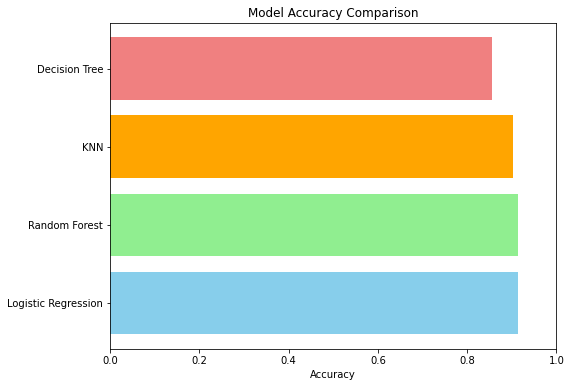

In [13]:
import matplotlib.pyplot as plt

# Model names and accuracies
models = ['Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree']
accuracies = [logreg_accuracy, rf_accuracy, knn_accuracy, dt_accuracy]

# Plotting the accuracies
plt.figure(figsize=(8, 6))
plt.barh(models, accuracies, color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.show()


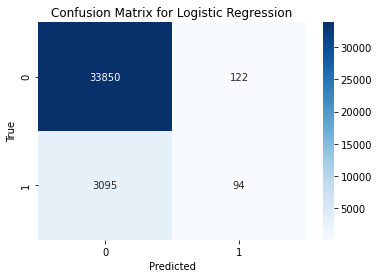

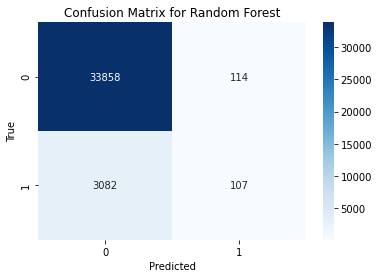

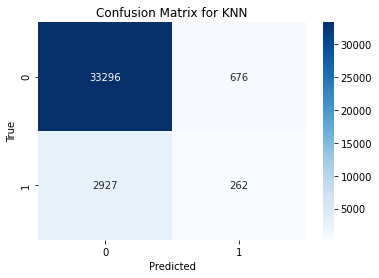

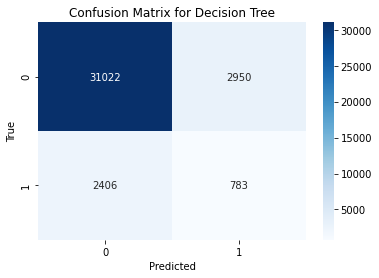

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define a function to plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix('Logistic Regression', y_test, y_pred_logreg)
plot_confusion_matrix('Random Forest', y_test, y_pred_rf)
plot_confusion_matrix('KNN', y_test, y_pred_knn)
plot_confusion_matrix('Decision Tree', y_test, y_pred_dt)

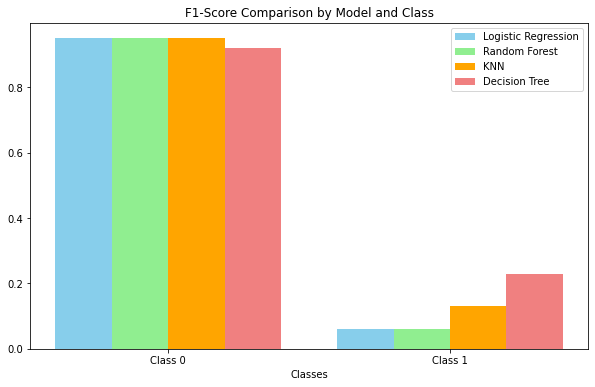

In [22]:
import numpy as np

# F1-scores for each model (these are just example values; use the values from your classification reports)
logreg_f1 = [0.95, 0.06]
rf_f1 = [0.95, 0.06]
knn_f1 = [0.95,  0.13]
dt_f1 = [0.92,  0.23]

# Plotting F1-scores for each model
labels = ['Class 0', 'Class 1']
x = np.arange(len(labels))  # Label locations
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width*1.5, logreg_f1, width, label='Logistic Regression', color='skyblue')
ax.bar(x - width/2, rf_f1, width, label='Random Forest', color='lightgreen')
ax.bar(x + width/2, knn_f1, width, label='KNN', color='orange')
ax.bar(x + width*1.5, dt_f1, width, label='Decision Tree', color='lightcoral')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_title('F1-Score Comparison by Model and Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression Hyperparameter Tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train_scaled, y_train)

# Best parameters and score
best_logreg_params = grid_log_reg.best_params_
best_logreg_score = grid_log_reg.best_score_


In [21]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Best parameters and score
best_rf_params = grid_rf.best_params_
best_rf_score = grid_rf.best_score_


In [18]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

# Best parameters and score
best_knn_params = grid_knn.best_params_
best_knn_score = grid_knn.best_score_


In [19]:
param_grid_dt = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# Best parameters and score
best_dt_params = grid_dt.best_params_
best_dt_score = grid_dt.best_score_


In [20]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('rf_clf', rf_clf),
    ('knn', knn),
    ('dt_clf', dt_clf)
], voting='hard')

voting_clf.fit(X_train_scaled, y_train)
voting_accuracy = voting_clf.score(X_test_scaled, y_test)


In [23]:
from sklearn.model_selection import cross_val_score

# Example: 5-fold cross-validation for Logistic Regression
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
cv_mean_accuracy = cv_scores.mean()


In [25]:
    # Best parameters from GridSearchCV
best_logreg_params = grid_log_reg.best_params_

# Retrain Logistic Regression using the best parameters
final_log_reg = LogisticRegression(**best_logreg_params, max_iter=1000)
final_log_reg.fit(X_train_scaled, y_train)

# Evaluate on test data
final_logreg_accuracy = final_log_reg.score(X_test_scaled, y_test)
print(f"Final Logistic Regression Accuracy: {final_logreg_accuracy}")


Final Logistic Regression Accuracy: 0.9134576572212804


In [27]:
# Best parameters from GridSearchCV
best_rf_params = grid_rf.best_params_

# Retrain Random Forest with the best parameters
final_rf_clf = RandomForestClassifier(**best_rf_params, random_state=42)
final_rf_clf.fit(X_train, y_train)

# Evaluate on test data
final_rf_accuracy = final_rf_clf.score(X_test, y_test)
print(f"Final Random Forest Accuracy: {final_rf_accuracy}")


Final Random Forest Accuracy: 0.9145340545195232


In [28]:
# Best parameters from GridSearchCV
best_knn_params = grid_knn.best_params_

# Retrain KNN with the best parameters
final_knn = KNeighborsClassifier(**best_knn_params)
final_knn.fit(X_train_scaled, y_train)

# Evaluate on test data
final_knn_accuracy = final_knn.score(X_test_scaled, y_test)
print(f"Final KNN Accuracy: {final_knn_accuracy}")


Final KNN Accuracy: 0.9100131858669035


In [30]:
    # Best parameters from GridSearchCV
best_dt_params = grid_dt.best_params_

# Retrain Decision Tree with the best parameters
final_dt_clf = DecisionTreeClassifier(**best_dt_params, random_state=42)
final_dt_clf.fit(X_train, y_train)

# Evaluate on test data
final_dt_accuracy = final_dt_clf.score(X_test, y_test)
print(f"Final Decision Tree Accuracy: {final_dt_accuracy}")


Final Decision Tree Accuracy: 0.9135922068835607


In [33]:
from sklearn.model_selection import cross_val_score

# Cross-validate the final Random Forest model
cv_scores = cross_val_score(final_rf_clf, X_train_scaled, y_train, cv=5)
print(f"Cross-validated scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")


Cross-validated scores: [0.91607521 0.9157052  0.91580328 0.91570237 0.9161733 ]
Mean CV Accuracy: 0.9158918744589852


Cross-validation Scores (Accuracy):
Logistic Regression: 0.9154882148359847
Random Forest: 0.9158918744589852
KNN: 0.911579501478751
Decision Tree: 0.91377269057432


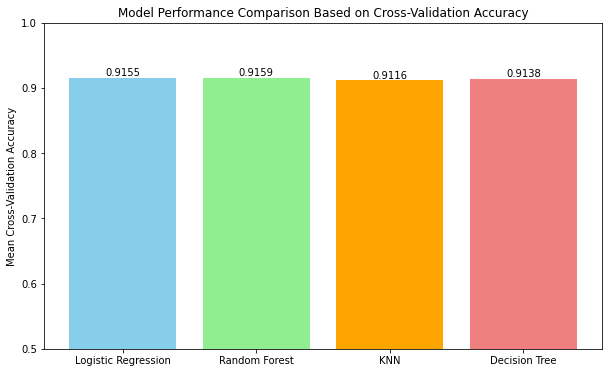

In [32]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# List of models (using your final models with the best hyperparameters)
models = {
    'Logistic Regression': final_log_reg,
    'Random Forest': final_rf_clf,
    'KNN': final_knn,
    'Decision Tree': final_dt_clf
}

# Store cross-validation scores
cv_scores = {}

# Perform 5-fold cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores[model_name] = scores.mean()

# Print cross-validation scores for each model
print("Cross-validation Scores (Accuracy):")
for model_name, score in cv_scores.items():
    print(f"{model_name}: {score}")

# Visualization of Cross-Validation Scores
model_names = list(cv_scores.keys())
scores = list(cv_scores.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, scores, color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])

# Add values above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# Customize plot
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Model Performance Comparison Based on Cross-Validation Accuracy')
plt.ylim(0.5, 1)  # Adjust the limits based on your models' performance
plt.show()



Cross-validation Scores (Accuracy):
Logistic Regression: 0.9154882148359847
Random Forest: 0.9158918744589852
KNN: 0.911579501478751
Decision Tree: 0.91377269057432

Cross-validation Scores (Precision):
Logistic Regression: 0.48977938938549875
Random Forest: 0.5690556014975636
KNN: 0.3372263170301032
Decision Tree: 0.375305805443798

Cross-validation Scores (Recall):
Logistic Regression: 0.02749855103301422
Random Forest: 0.015861686772241444
KNN: 0.04997597493644394
Decision Tree: 0.03283929249125459

Cross-validation Scores (F1):
Logistic Regression: 0.052069284625824185
Random Forest: 0.030838660566815685
KNN: 0.08698331218297718
Decision Tree: 0.06031602175198307


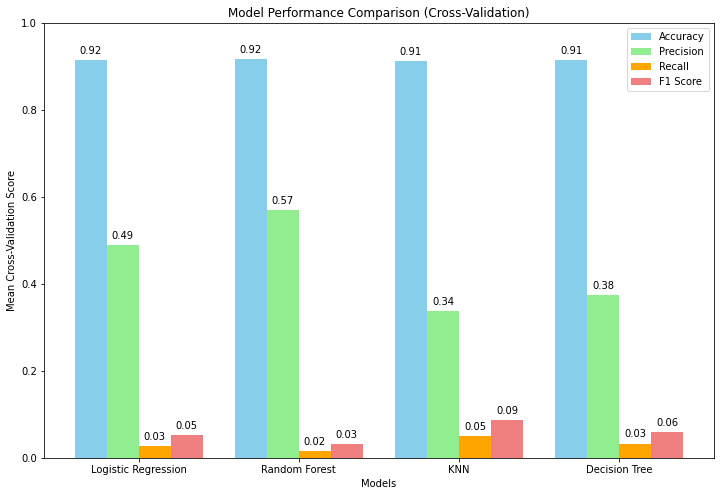

In [52]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# List of models (using your final models with the best hyperparameters)
models = {
    'Logistic Regression': final_log_reg,
    'Random Forest': final_rf_clf,
    'KNN': final_knn,
    'Decision Tree': final_dt_clf
}

# Metrics we want to evaluate
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Store cross-validation scores for each metric
cv_scores = {metric: {} for metric in scoring_metrics}

# Perform 5-fold cross-validation for each model and each metric
for model_name, model in models.items():
    for metric in scoring_metrics:
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=metric)
        cv_scores[metric][model_name] = scores.mean()

# Print cross-validation scores for each model and metric
for metric in scoring_metrics:
    print(f"\nCross-validation Scores ({metric.capitalize()}):")
    for model_name, score in cv_scores[metric].items():
        print(f"{model_name}: {score}")

# Visualization of Cross-Validation Scores for all metrics
model_names = list(models.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral']

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set up width for bars
bar_width = 0.2
index = np.arange(len(model_names))

# Plotting each metric as a separate group of bars
for i, metric in enumerate(scoring_metrics):
    scores = [cv_scores[metric][model] for model in model_names]
    ax.bar(index + i * bar_width, scores, bar_width, label=metrics[i], color=colors[i])

# Customize plot
ax.set_xlabel('Models')
ax.set_ylabel('Mean Cross-Validation Score')
ax.set_title('Model Performance Comparison (Cross-Validation)')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(model_names)
ax.legend()

# Add values on top of bars
for i, metric in enumerate(scoring_metrics):
    scores = [cv_scores[metric][model] for model in model_names]
    for j, score in enumerate(scores):
        ax.text(j + i * bar_width, score + 0.01, f'{score:.2f}', ha='center', va='bottom')

plt.ylim(0, 1)
plt.show()


C:\Users\Almas\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Almas\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


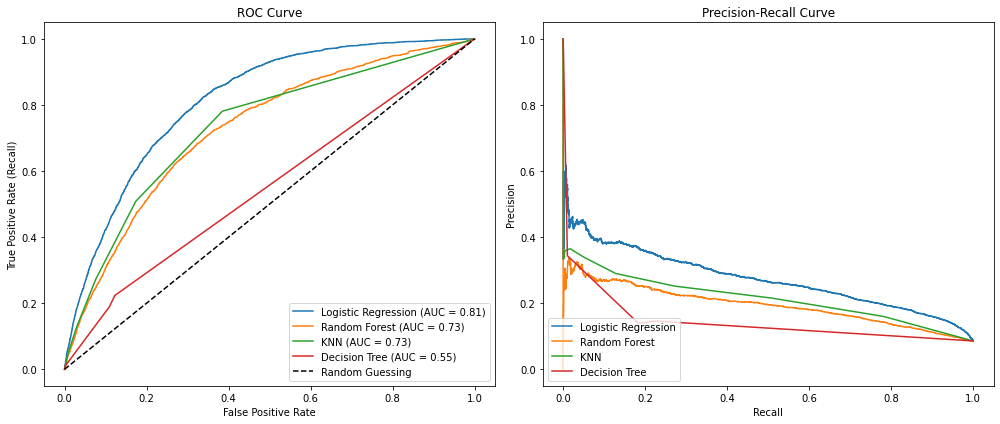

In [48]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Define your models in a dictionary
models = {
    'Logistic Regression': final_log_reg,
    'Random Forest': final_rf_clf,
    'KNN': final_knn,
    'Decision Tree': final_dt_clf
}

# Create subplots
fig, (ax_roc, ax_pr) = plt.subplots(1, 2, figsize=(14, 6))

# Plot ROC and Precision-Recall curves for all models
for model_name, model in models.items():
    # Get the predicted probabilities (for ROC and PR curves)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    ax_roc.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ax_pr.plot(recall, precision, label=f'{model_name}')

# Customize ROC curve plot
ax_roc.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate (Recall)')
ax_roc.set_title('ROC Curve')
ax_roc.legend(loc="lower right")

# Customize Precision-Recall curve plot
ax_pr.set_xlabel('Recall')
ax_pr.set_ylabel('Precision')
ax_pr.set_title('Precision-Recall Curve')
ax_pr.legend(loc="lower left")

# Show the plots
plt.tight_layout()
plt.show()


In [53]:
# Assuming you have trained a Logistic Regression model
y_probs = model.predict_proba(X_test)[:,1]  # Probabilities for the positive class
threshold = 0.4  # Set a lower threshold for improving recall
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluate performance metrics
from sklearn.metrics import recall_score, f1_score, precision_score
recall = recall_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
print(f"Recall: {recall}, Precision: {precision}, F1 Score: {f1}")


Recall: 0.14111006585136407, Precision: 0.40797824116047143, F1 Score: 0.2096924510717614


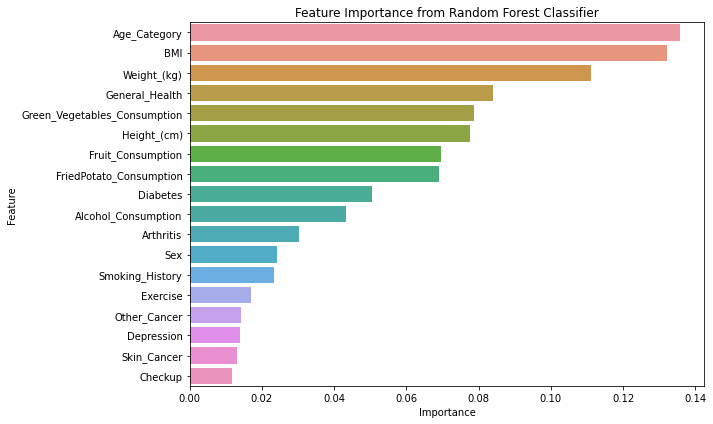

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your training data
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Extract feature importance
importances = final_rf_clf.feature_importances_

# Assuming X_train is a pandas DataFrame with feature names
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


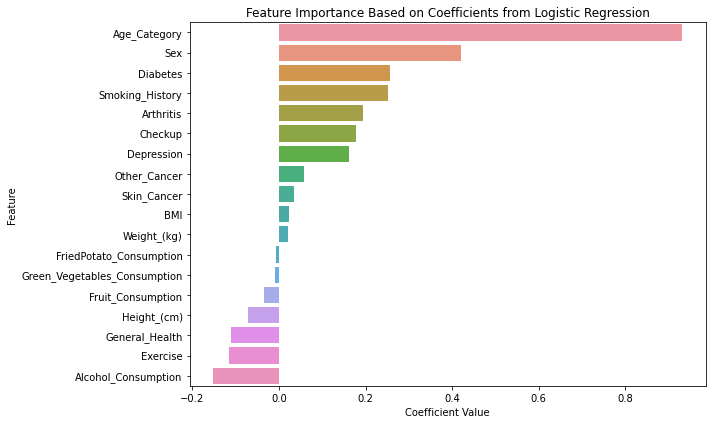

In [58]:
# Extract feature importance (coefficients)
coefficients = final_log_reg.coef_[0]  # For binary classification, we take the first index

# Get feature names from the DataFrame (if X_train_scaled is a DataFrame)
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by coefficient value
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Plotting the feature importance (coefficients)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Based on Coefficients from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()